In [1]:
import scanpy as sc
import anndata
#import pl
#import tl
import numpy as np
import time as time

# Load Dataset
filelocation = r"datasets/VBh_converted.h5ad"
adata = anndata.read_h5ad(filelocation)

# subsampling
sc.pp.subsample(adata, 0.5)

# normalizing
adata.X = np.arcsinh(adata.X / 10)

# calc knn
sc.pp.neighbors(adata, n_neighbors=20)

/home/felix/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


**Calculate Landmarks**

In [2]:
from scipy.sparse import csr_matrix, spdiags
from scipy.sparse.linalg import eigs
# concentrated

c = adata.obsp['connectivities']

T = c.multiply(csr_matrix(1.0 / np.abs(c).sum(1)))

D, V = eigs(T.T, which='LM')

pi = V[:, 0]

pi = pi.real

pi /= pi.sum()

Pi = spdiags(pi, 0, pi.shape[0], pi.shape[0])



Taking 1.0% of all cells as landmarks
--> 647 of originally 64733 cells


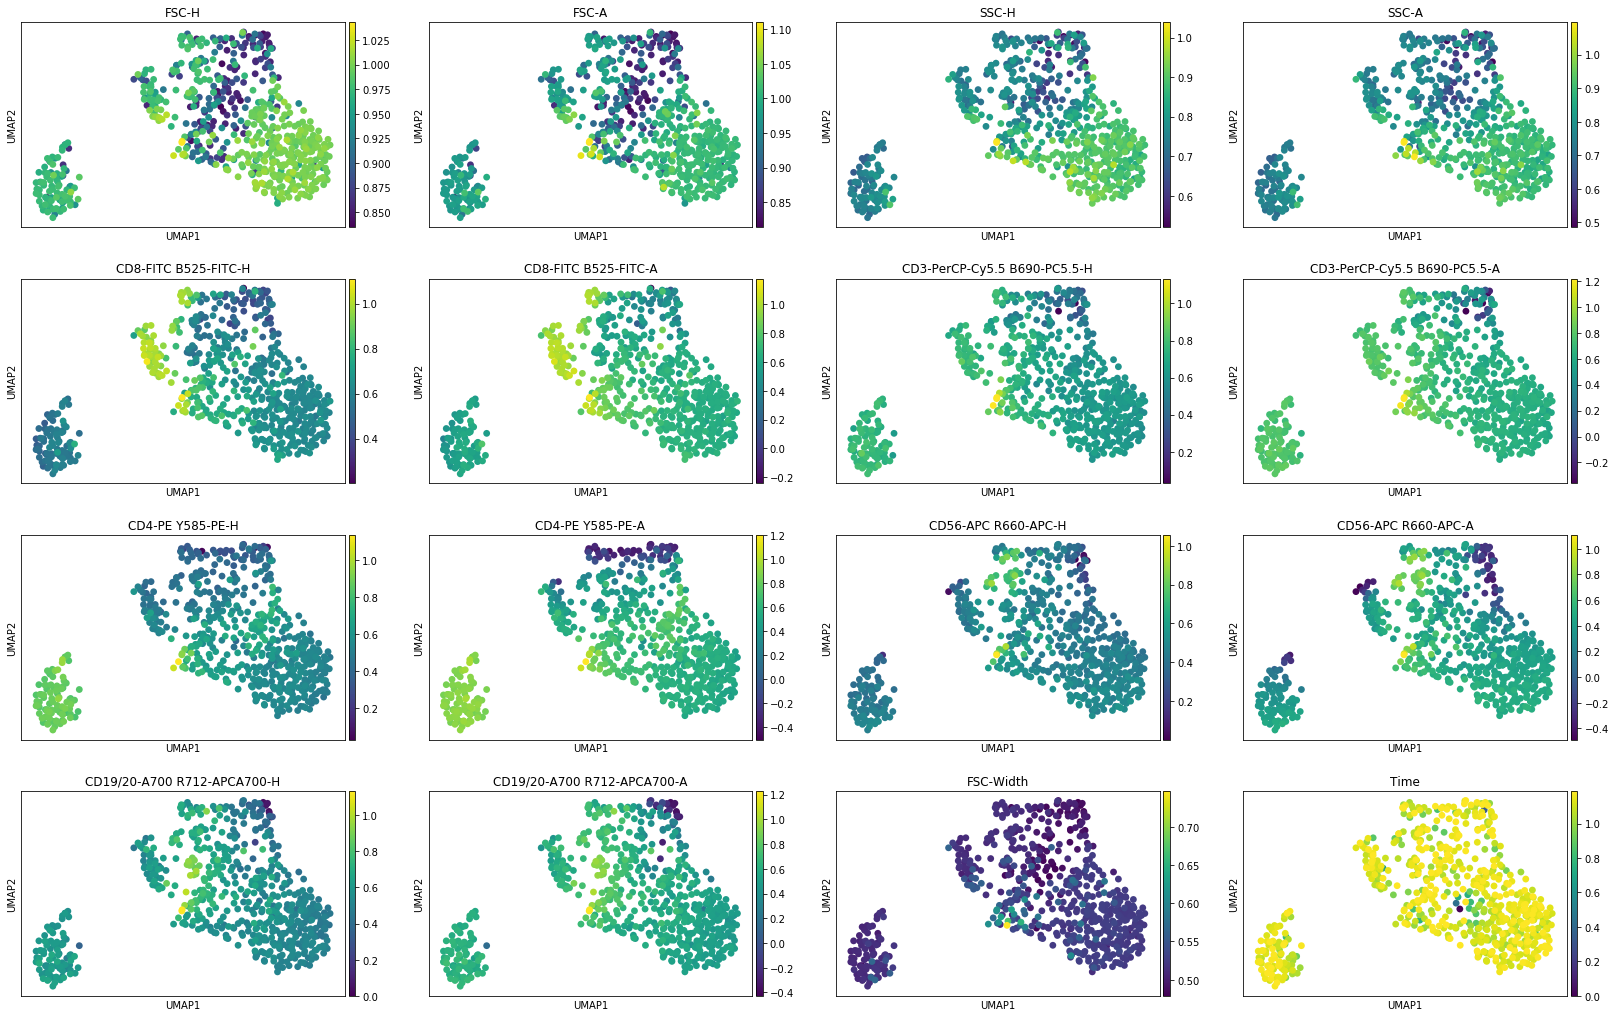

In [3]:
# copy original anndata object
speichi = adata.copy()

percentage = 0.01
# reduce it to certain fraction (landmarks)
speichi = speichi[pi.argsort()[:int(len(adata)*percentage)]]
print(f"Taking {percentage*100}% of all cells as landmarks")
print(f"--> {len(speichi.X)} of originally {len(adata.X)} cells")

# normalizing
speichi.X = np.arcsinh(speichi.X / 10)
# (re)calculate knn
sc.pp.neighbors(speichi, n_neighbors=20)
# calculate umap embedding
sc.tl.umap(speichi)
# plot umap embedding
sc.pl.umap(speichi, color=adata.var_names.values)

64733 of originally 64733 cells


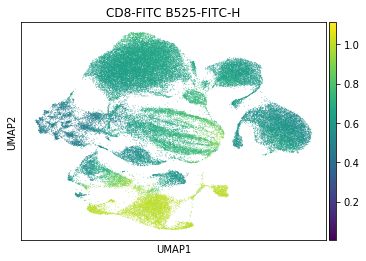

57450 of originally 64733 cells


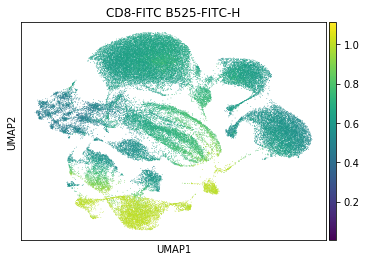

50168 of originally 64733 cells


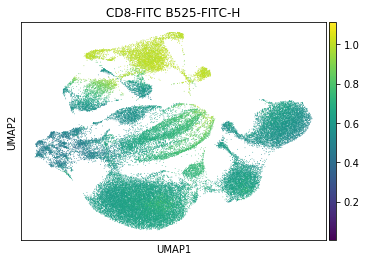

42885 of originally 64733 cells


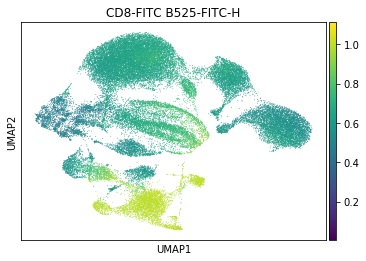

35603 of originally 64733 cells


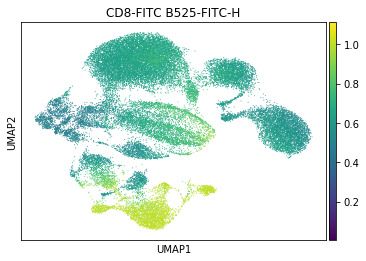

28320 of originally 64733 cells


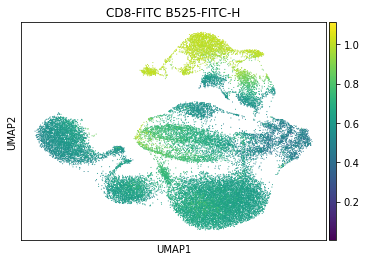

21038 of originally 64733 cells


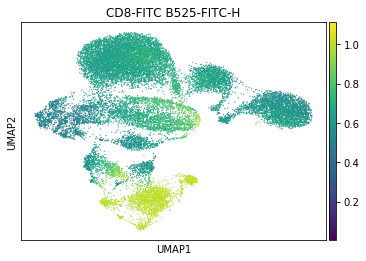

13755 of originally 64733 cells


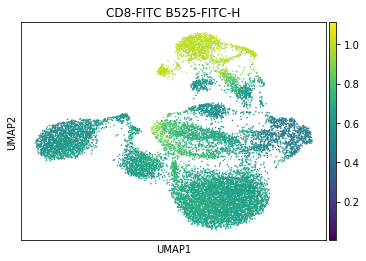

6473 of originally 64733 cells


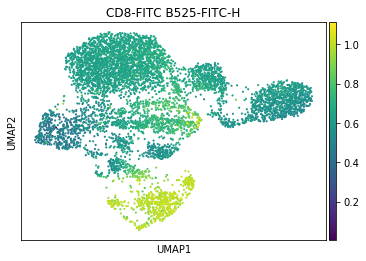

In [4]:
for part in np.linspace(1,0.1,9):
    
    # copy original anndata object
    speichi = adata.copy()
    # reduce it to certain fraction (landmarks)
    speichi = speichi[pi.argsort()[:int(len(adata)*part)]]
    
    print(f"{len(speichi.X)} of originally {len(adata.X)} cells")
    
    # normalizing
    speichi.X = np.arcsinh(speichi.X / 10)
    # (re)calculate knn
    sc.pp.neighbors(speichi, n_neighbors=20)
    # calculate umap embedding
    sc.tl.umap(speichi)
    # plot umap embedding
    sc.pl.umap(speichi, color=adata.var_names.values[4])